# Support Vector Machine (SVM)

@ariewahyu

Support Vector Machine (SVM) merupakan salah satu metode dalam machine learning yang umum digunakan untuk klasifikasi.
Secara prinsip, SVM mengenal 3 konsep utama. Misalkan kita memiliki data dengan 2 variabel/atribut yaitu X1 dan X2 yang terklasifikasikan menjadi 2 kelas, yaitu kelas positif (warna hijau) dan kelas negatif (warna merah). Perhatikan gambar di bawah ini. 

Pertama, **support vectors** yaitu unit-unit data yang berada di perbatasan antar kelas. Kedua, **hyperplane** yaitu garis batas yang memisahkan kedua kelas. Garis ini akan dibentuk dari fungsi persamaan. Dalam kasus dengan 3 atribut, maka visualisasi menjadi 3 dimensi, hyperplane ini dapat berupa bidang, bukan lagi garis.
Ketiga, **margin** yaitu jarak antara hyperplane dengan support vector. Tujuan SVM adalah memaksimumkan margin ini, sehingga 2 kelas akan terpisah/terklasifikasikan secara jelas.
![SVM-1](https://raw.githubusercontent.com/ariewahyu/ariewahyu.github.io/master/machine_learning/SVM.png)

Di latihan ini, kita akan menggunakan SVM untuk mengklasifikasikan kasus breast cancer (kanker payudara), salah satu dataset standar yang cukup mudah diklasifikasikan.

## Meng-import library yang diperlukan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Memanggil data

Kita akan menggunakan dataset breast cancer yang sudah disediakan oleh Scikit-Learn. 

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

**Menampilkan data dalam bentuk dictionary form**

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Karena ini adalah data built-in standar dari Scikit-Learn, kita juga bisa melihat deskripsi keterangan dari dataset ini**

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**Menampilkan semua atribut/variabel/feature dari dataset**

In [6]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Menyimpan dataset ke dalam bentuk DataFrame

Dengan format DataFrame, kita akan mudah melakukan berbagai perintah dan modifikasi pada data untuk analisis berikutnya.
Kita akan menampilkan informasi tipe data serta jumlah baris yang tidak kosong (non-null) dari masing-masing atribut/variabel. 

In [8]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**Menampilkan statistik deskriptif dari data, perhatikan bagaimana data menyebar, nilai minimum, maksimum, rata-rata, simpangan baku, dan apakah data hanya berkumpul pada rentang kuartil tertentu. Hal ini penting untuk kita lakukan preprocessing berikutnya** 

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Pengecekan missing data**

In [10]:
np.sum(pd.isnull(df).sum()) # Sum of the count of null objects in all columns of data frame

0

Tidak ada missing data.

**Pengecekan nilai kelas/label/target pada dataset ini**

Dalam dataset breast cancer, setiap pasien memiliki diagnosis yaitu kanker jinak/*benign* (kode 0) atau dapat dikatakan sehat dan kanker ganas/*malignant* (kode 1)


In [12]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

**Menambahkan kolom target/kelas ke dalam DataFrame**

Kemudian kita akan melihat kolom dan baris-baris awal dari data dengan perintah df.head()

In [13]:
df['Cancer'] = pd.DataFrame(cancer['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
## Exploratory Data Analysis


### Apakah data kita imbalance?

Imbalance dataset yaitu apabila sebaran data untuk masing-masing kelas sangat berbeda secara ekstrim. Pada data breast cancer ini, kelas 0 (kanker jinak) berjumlah 200-an, sedangkan kelas 1 (kanker ganas) berjumlah 350-an atau 75% lebih banyak. 

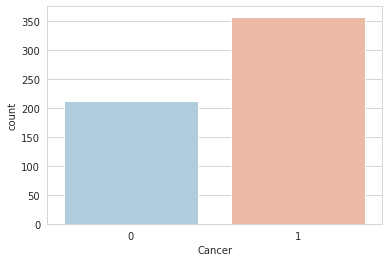

In [14]:
sns.set_style('whitegrid')
sns.countplot(x=df['Cancer'],data=df,palette='RdBu_r')

### Pemeriksaan sebaran nilai data pada tiap atribut/variabel untuk masing-masing kelas dengan box-plot

Dengan melihat apakah ada perbedaan sebaran nilai yang mencolok, kita bisa mendapatkan gambaran, atribut/variabel manakah yang secara umum kita duga bisa menjadi pembeda utama antara 2 kelas.


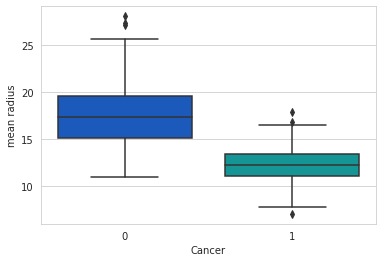

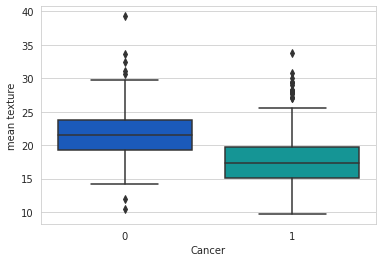

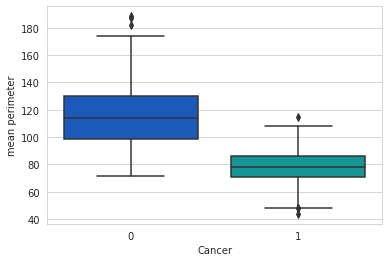

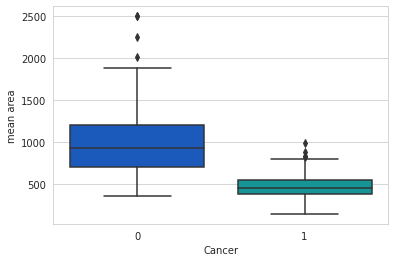

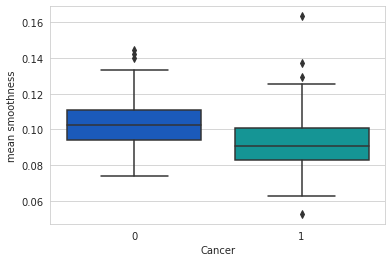

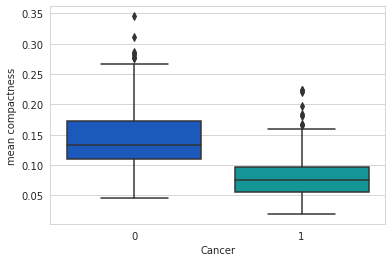

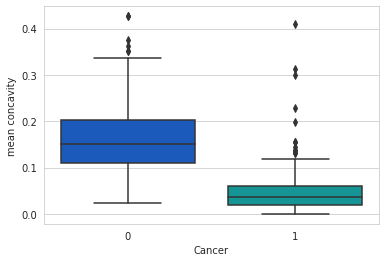

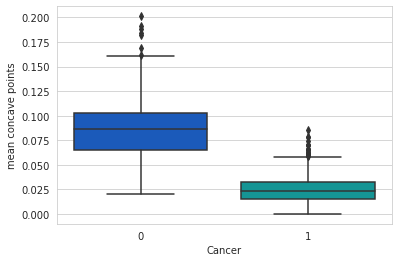

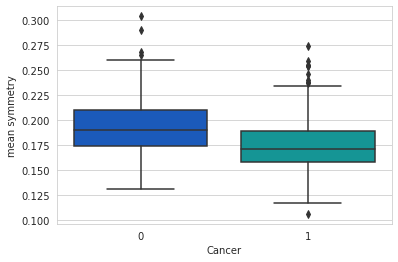

<Figure size 432x288 with 0 Axes>

In [15]:
l=list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='Cancer',y=l[i], data=df, palette='winter')
    plt.figure()

### Tidak semua atribut/variabel dapat menunjukan pemisahan prediksi jenis kanker dengan jelas

Perhatikan sebaran data pada kelas 1 dan 0.

Misalnya, dari dua plot berikut jelas bahwa nilai atribut *mean area* yang lebih kecil umumnya menunjukkan deteksi kanker positif (kanker ganas). 

Sementara itu, tidak ada hal konkret yang dapat kita simpulkan dari plot atribut *mean smoothness* karena sebaran nilainya hampir sama dan saling beririsan. 

Text(0.5, 1.0, 'Kanker menurut nilai atribut: mean smoothness')

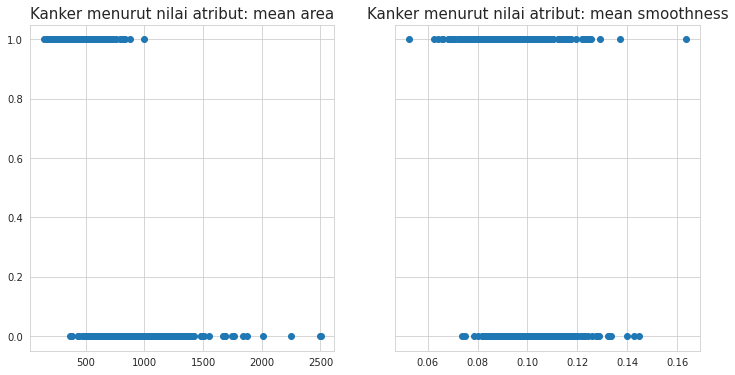

In [18]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['mean area'],df['Cancer'])
ax1.set_title("Kanker menurut nilai atribut: mean area", fontsize=15)
ax2.scatter(df['mean smoothness'],df['Cancer'])
ax2.set_title("Kanker menurut nilai atribut: mean smoothness", fontsize=15)

Text(0.5, 1.0, 'Sehat')

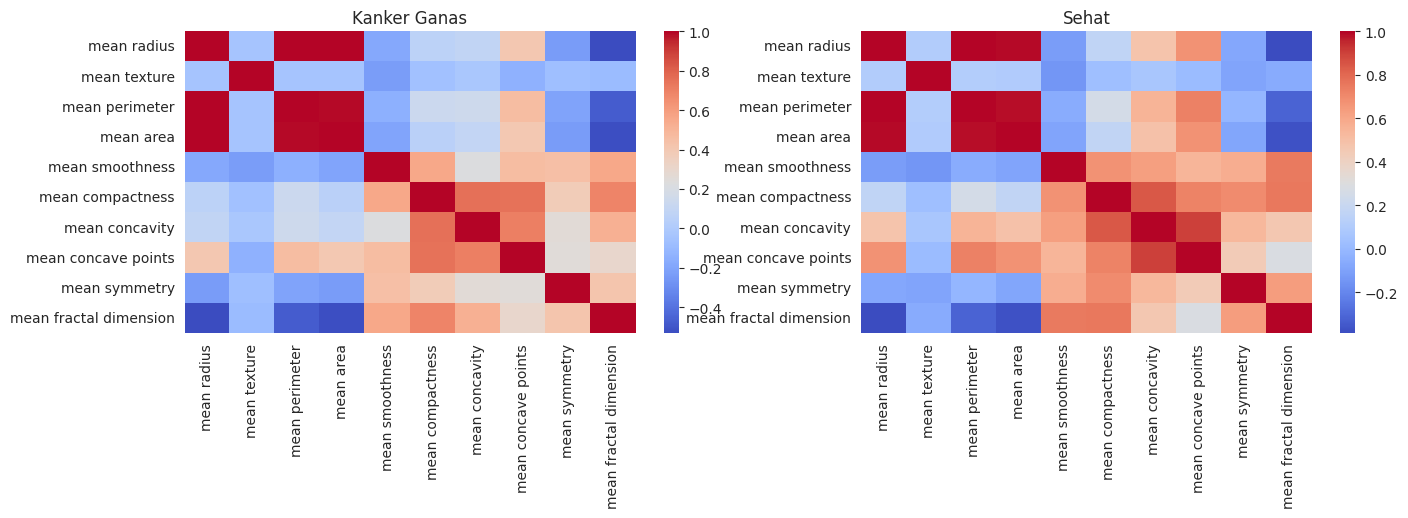

In [65]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(df[df['Cancer']==1][['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('Kanker Ganas')
ax = sns.heatmap(df[df['Cancer']==0][['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Sehat')

Terlihat bahwa beberapa atribut bisa kita duga bisa menjadi pembeda seperti *mean concativity* dan *mean area*, namun secara umum pada atribut lainnya tidak terdapat perbedaan. 

## Training dan Pembangunan Model 

### Pemisahan data menjadi data latih (*training set*) dan data uji (*testing set*) dengan metode **Split**

In [22]:
# Kita akan membuat 2 DataFrame:  
# df_feat yang khusus hanya akan berisi nilai-nilai atribut/fitur/variabel saja.
# dan 
# df_target yang khusus hanya akan berisi label/kelas/target 
df_feat = df.drop('Cancer',axis=1) 
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
# df_target yang khusus hanya akan berisi label/kelas/target, yaitu apakah positif kanker ganas atau tidak
df_target = df['Cancer'] 
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Cancer, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [47]:
# Proporsi yang digunakan adalah 70% untuk training dan 30% untuk testing secara acak.
# Karena pembagian dilakukan secara acak, maka, kita tambahkan parameter random_state agar pengacakan ini bisa direplikasi kemudian hari
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=0)

X_train: atribut-atribut data latih

X_test: atribut-atribut data uji

y_train: label/kelas data latih

y_test: label/kelas data uji


In [48]:
y_train.head()

478    1
303    1
155    1
186    0
101    1
Name: Cancer, dtype: int64

### Melakukan training model Support Vector Machine (SVM)

SVM dapat digunakan baik untuk klasifikasi (disebut sebagai Support Vector Classifier) dan juga untuk regresi (disebut sebagai Support Vector Regression). Di sini, kita akan menggunakan Support Vector Classifier (SVC)

In [32]:
from sklearn.svm import SVC

In [49]:
model = SVC(random_state=0)

In [50]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Perhatikan bahwa secara default, parameter yang digunakan SVM adalah memilih kernel Radial Basis Function (RBF) atau juga disebut sebagai Gaussian.

Terdapat beberapa pilihan kernel pada SVM: Linear, Polynomial, RBF, Sigmoid, ataupun kita bisa membuat custom kernel sendiri.

Perhatikan contoh berikut bagaimana pengaruh pemilihan kernel pada klasifikasi untuk contoh kasus Iris dataset.

![SVM-kernel](https://raw.githubusercontent.com/ariewahyu/ariewahyu.github.io/master/machine_learning/svm%20kernel.png)

### Prediksi dan Evaluasi Model

In [35]:
from sklearn.datasets import make_classification

predictions = model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


**Menampilkan Confusion Matrix**

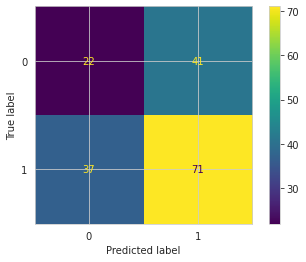

In [52]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Perhatikan bahwa masih terdapat banyak kesalahan prediksi. Sehingga penting untuk kita melakukan pemilihan parameter model SVM yang lebih tepat. Preprocessing pada data dengan normalisasi atau transformasi juga mungkin bisa membantu.

**Menghitung Accuracy,Precision, Recall, dan F1-Score**

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.37      0.35      0.36        63
           1       0.63      0.66      0.65       108

    accuracy                           0.54       171
   macro avg       0.50      0.50      0.50       171
weighted avg       0.54      0.54      0.54       171



## Pemilihan Parameter Model dengan **GridSearch**

Pencarian parameter model yang tepat (seperti nilai C atau gamma yang digunakan) merupakan tugas yang rumit. Tetapi untungnya, Scikit-learn memiliki fungsionalitas untuk mencoba banyak kombinasi dan melihat mana yang paling berhasil, yang disebut dengan Grid Search Cross Validation (GridSearchCV).

**GridSearchCV membuat sebuah dictionary kumpulan pasangan parameter yang harus dicoba pada model.**

Kita tinggal memasukkan daftar nilai parameter model yang perlu dicoba. Misalnya untuk SVM ini kita akan memvariasikan nilai parameter C, gamma, serta jenis kernelnya.

In [54]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','polynomial','sigmoid']} 

In [55]:
from sklearn.model_selection import GridSearchCV

Salah satu hal menarik tentang GridSearchCV adalah peranannya sebagai meta-classifier. GridSearchCV akan mengambil model yang dipakai sebagai classifier, misalnya SVM, dan membuat classifier baru, yang berperilaku persis sama - dalam hal ini, seperti classifier kita sebelumnya. 

Kita bisa juga menambahkan parameter refit=True dan memilih verbose ke nomor mana pun yang kita inginkan, semakin tinggi angkanya, semakin verbose (verbose maksudnya adalah menampilkan output teks yang menjelaskan proses).

In [56]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

GridSearchCV akan menjalankan perulangan yang sama dengan teknik cross validation untuk menemukan kombinasi parameter terbaik. Setelah memiliki kombinasi terbaik, lalu dilakukan running pada semua data latih untuk membangun satu model baru menggunakan pengaturan kombinasi parameter terbaik.

In [57]:
# Proses ini bisa memakan waktu yang lama, tergantung dari ukuran data dan banyaknya kombinasi parameter model
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'polynomial' is not in list

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarni

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'polynomial', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

**Kita bisa memeriksa kombinasi parameter terbaik yang ditemukan oleh GridSearchCV di best\_params\_ attribute, dan model klasifikasi terbaik di best\_estimator\_ attribute**

In [58]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [59]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Kemudian kita bisa melakukan prediksi lagi pada objek seperti yang kita lakukan dengan model normal**

In [60]:
grid_predictions = grid.predict(X_test)

**Kita tampilkan Confusion Matrix untuk melihat perbaikan pada model**

In [61]:
print(confusion_matrix(y_test,grid_predictions))

[[ 61   2]
 [  8 100]]


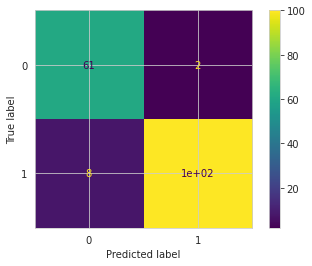

In [63]:
cm = confusion_matrix(y_test, grid_predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

**Pemeriksaan Accuracy, Precision, Recall, dan F1-Score**

In [62]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        63
           1       0.98      0.93      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.94      0.94      0.94       171



**Luar biasa, dari awalnya hanya akurasi 54%, dengan kombinasi parameter terbaik, kita bisa memaksimalkan model SVM menjadi 94% akurasi pada klasifikasi breast cancer**
